In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/obesity_level (1).csv")
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [ ]:
data.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [ ]:
data.shape

(20758, 18)

In [ ]:
data.head(6)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,Sometimes,0,2.137550,0,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# **NULL Value** finding

In [ ]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)


id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
0be1dad                           0.0
dtype: float64


<Axes: >

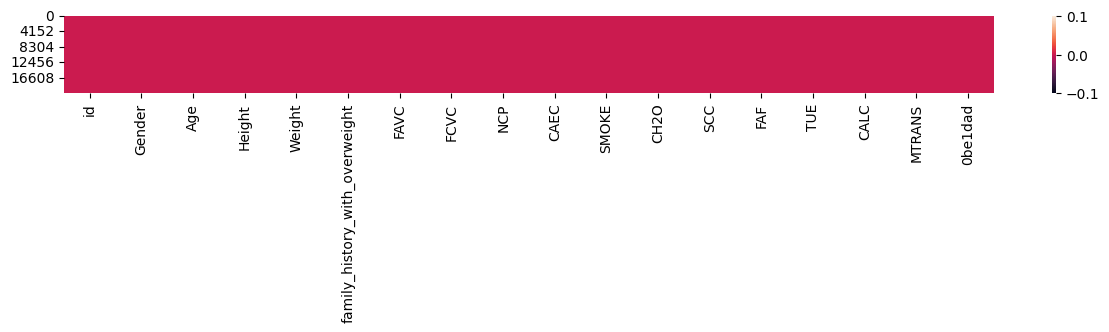

In [ ]:
plt.figure(figsize=(15,1))
sns.heatmap(df.isnull())

In [ ]:
data.shape[0]

20758

In [ ]:
null_var = df.isnull().sum()/data.shape[0] *100
null_var

,0
id,0.0
Gender,0.0
Age,0.0
Height,0.0
Weight,0.0
family_history_with_overweight,0.0
FAVC,0.0
FCVC,0.0
NCP,0.0
CAEC,0.0


In [ ]:
null_var

,0
id,0.0
Gender,0.0
Age,0.0
Height,0.0
Weight,0.0
family_history_with_overweight,0.0
FAVC,0.0
FCVC,0.0
NCP,0.0
CAEC,0.0


In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, 0be1dad]
Index: []


In [ ]:
df = data

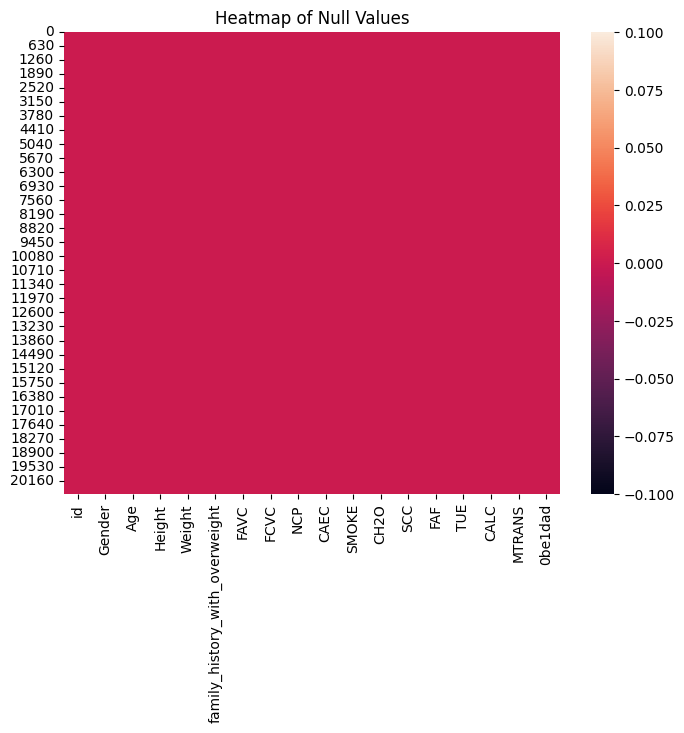

In [ ]:
# Creating the heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull())
plt.title('Heatmap of Null Values')
plt.show()

In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,object


In [ ]:
df.shape

(20758, 18)

In [ ]:
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [ ]:
df.duplicated().sum()

0

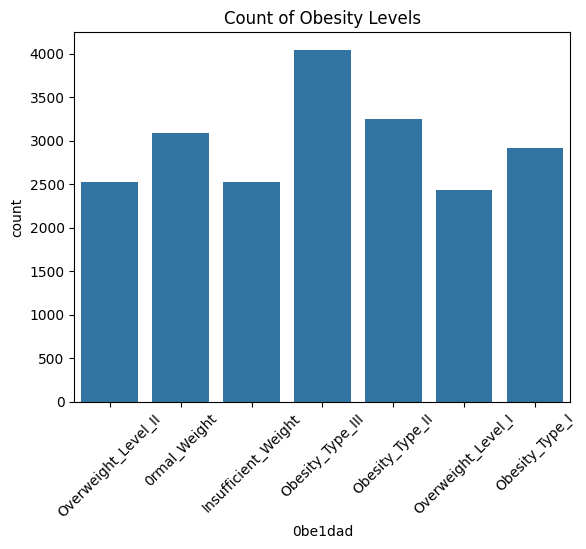

In [ ]:
# Plot a count plot for the obesity level column (0be1dad)
sns.countplot(data=data, x='0be1dad')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Count of Obesity Levels')
plt.show()

# Chart

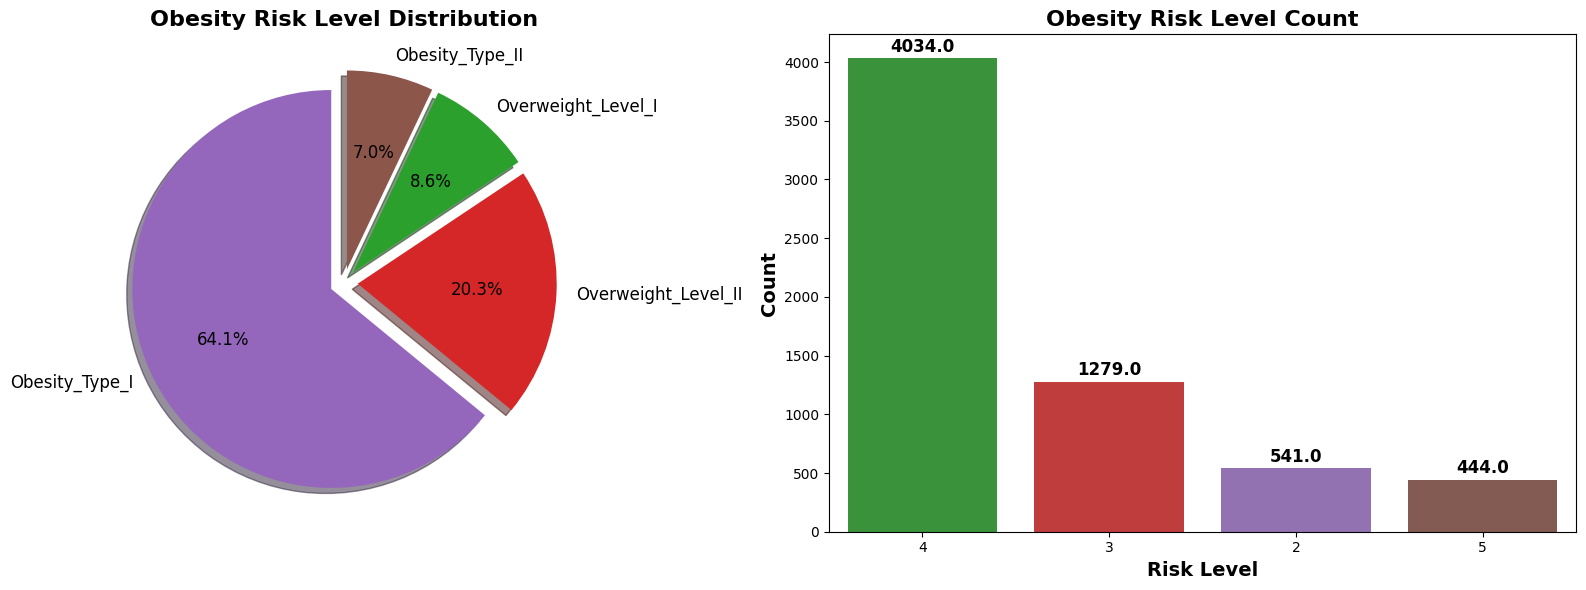

In [ ]:
# Clean column names and map the last column to "RiskLevel"
df.columns = df.columns.str.strip()
df.rename(columns={'0be1dad': 'RiskLevel'}, inplace=True)

# Define deep, bold colors and order for risk levels
p_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
risk_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II",
              "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Get value counts and filter for risk levels present in the DataFrame
risk_level_counts = df['RiskLevel'].value_counts()
present_risk_levels = risk_level_counts.index

# Reindex to include only present risk levels
risk_level_counts = risk_level_counts.reindex(present_risk_levels)

# --- Modified Section ---
# Get the original string labels for the present risk levels
labels = [risk_order[i] for i in present_risk_levels] # Get string labels based on present_risk_levels (numeric)

# Filter colors using the original string labels
colors = [p_colors[risk_order.index(label)] for label in labels]  # Use labels not present_risk_levels


# Pie chart with deep colors and updated layout using filtered data
risk_level_counts.plot(
    kind="pie", labels=labels, colors=colors, explode=[0.07] * len(present_risk_levels),
    autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=90, textprops={'fontsize': 12})
ax[0].set_title("Obesity Risk Level Distribution", fontsize=16, fontweight='bold')
ax[0].set_ylabel('')

# Bar chart with deep color palette and bold formatting
count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=present_risk_levels, hue="RiskLevel", palette=colors, legend=False)  # Update order and palette

# Add annotations
for bar in count.patches:
    count.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points', fontweight='bold')

ax[1].set_title("Obesity Risk Level Count", fontsize=16, fontweight='bold')
ax[1].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

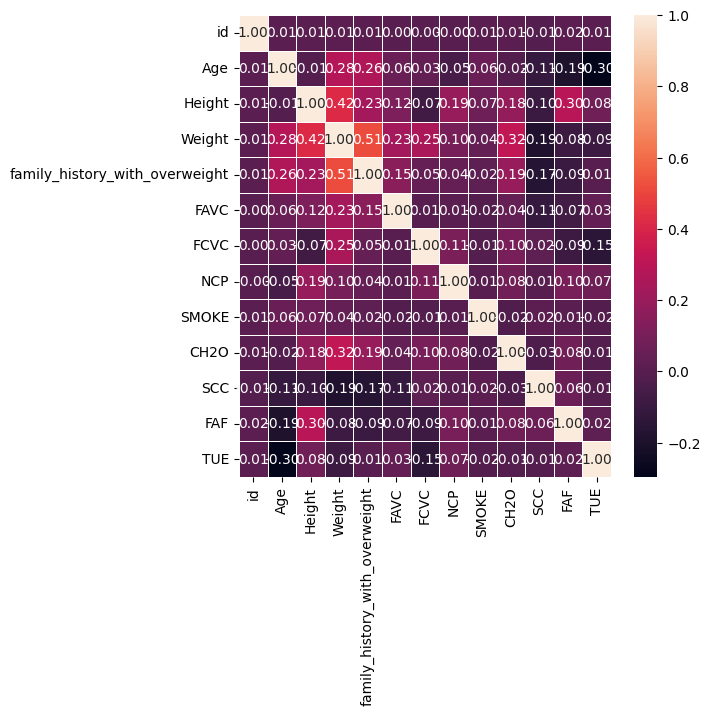

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(6,6))
sns.heatmap(numeric_df.corr(), annot=True, linewidth=0.5, fmt='0.2f')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Find all columns with string data type
string_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each string column
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
print(df.head())

   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     3      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     3      0   
3                               1     1  3.000000  3.000000     3      0   
4                               1     1  2.679664  1.971472     3      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  0be1dad  
0  2.763573    0  0.000000  0.976473     2       3        6  
1  2.000000    0  1.000000  1.000000     0       0        0  
2  1.910378    0  0.866045  1.673584     0       3      

# **OUTLIER** finding

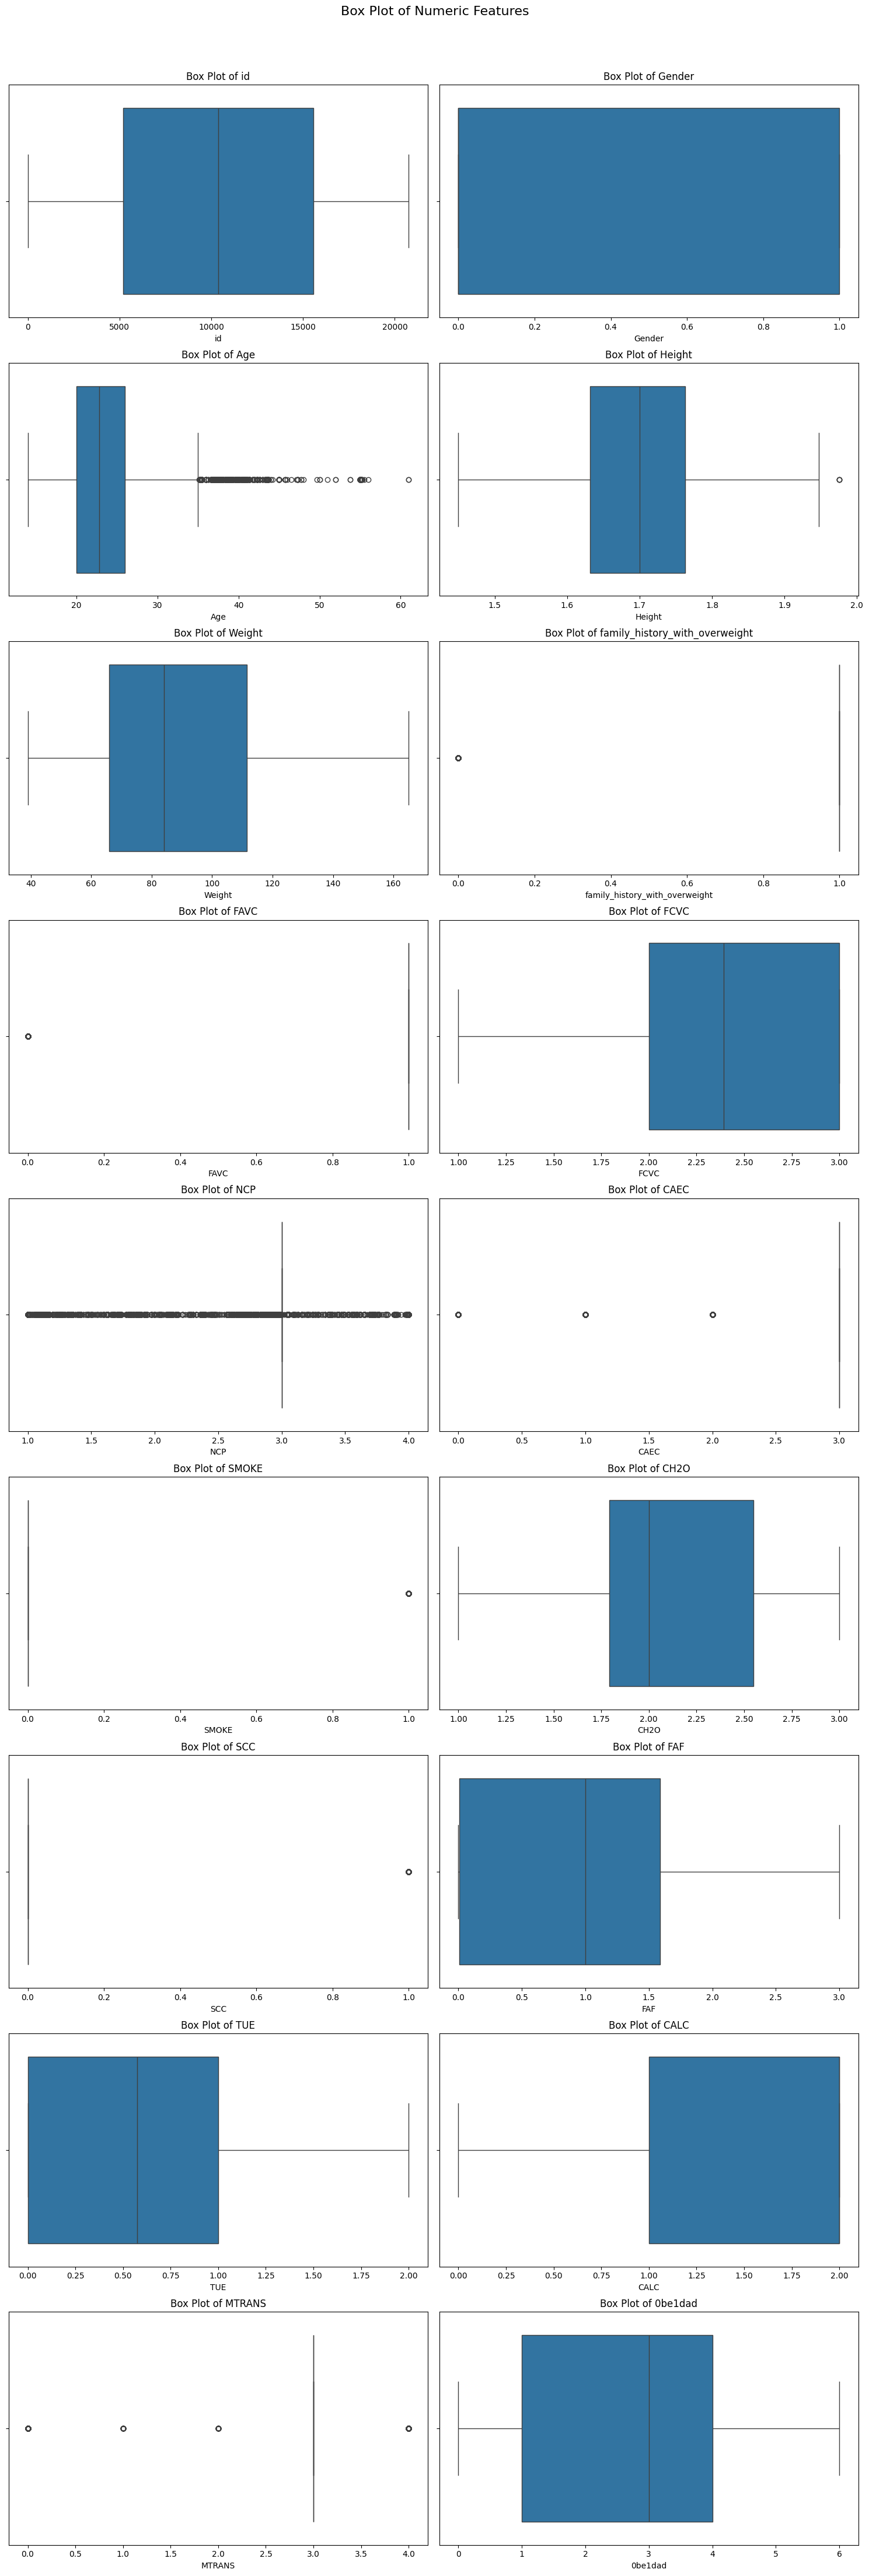

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows and columns dynamically based on the number of numeric columns
numeric_columns = df.select_dtypes(include='number').columns  # Get numeric columns from df
n_numeric_columns = len(numeric_columns)
n_cols = 2
n_rows = (n_numeric_columns + n_cols - 1) // n_cols  # Calculate rows to fit all features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust height dynamically
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot boxplots for each numeric feature
for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=df[feature], ax=axes[i])  # Use df instead of data
    axes[i].set_title(f'Box Plot of {feature}')

# Remove unused axes
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Slightly reduce the top spacing for the title
plt.show()

In [ ]:
df.dtypes

,0
id,int64
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64


In [ ]:
# List to store column names with outliers
# First, select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include='number').columns

# List to store column names with outliers
columns_with_outliers = []

# Loop through numeric columns to find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if the column contains any outliers
    if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
        columns_with_outliers.append(col)

# Display column names with outliers
print("Columns containing outliers:")
print(columns_with_outliers)



Columns containing outliers:
['Age', 'Height', 'family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'MTRANS']


In [ ]:
# First, select numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include='number').columns

# Dictionary to store the percentage of outliers for each column
outlier_percentage = {}

# Loop through numeric columns to calculate outlier percentage
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Calculate the percentage of outliers
    outlier_percentage[col] = (outliers.sum() / len(df)) * 100

# Display the outlier percentage for each numeric column
print("Percentage of outliers in each numeric column:")
for col, percentage in outlier_percentage.items():
    print(f"{col}: {percentage:.2f}%")


Percentage of outliers in each numeric column:
id: 0.00%
Gender: 0.00%
Age: 5.17%
Height: 0.02%
Weight: 0.00%
family_history_with_overweight: 18.04%
FAVC: 8.56%
FCVC: 0.00%
NCP: 29.16%
CAEC: 15.56%
SMOKE: 1.18%
CH2O: 0.00%
SCC: 3.31%
FAF: 0.00%
TUE: 0.00%
CALC: 0.00%
MTRANS: 19.61%
0be1dad: 0.00%


In [ ]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    df = df.drop(outliers.index)

# After removing outlier

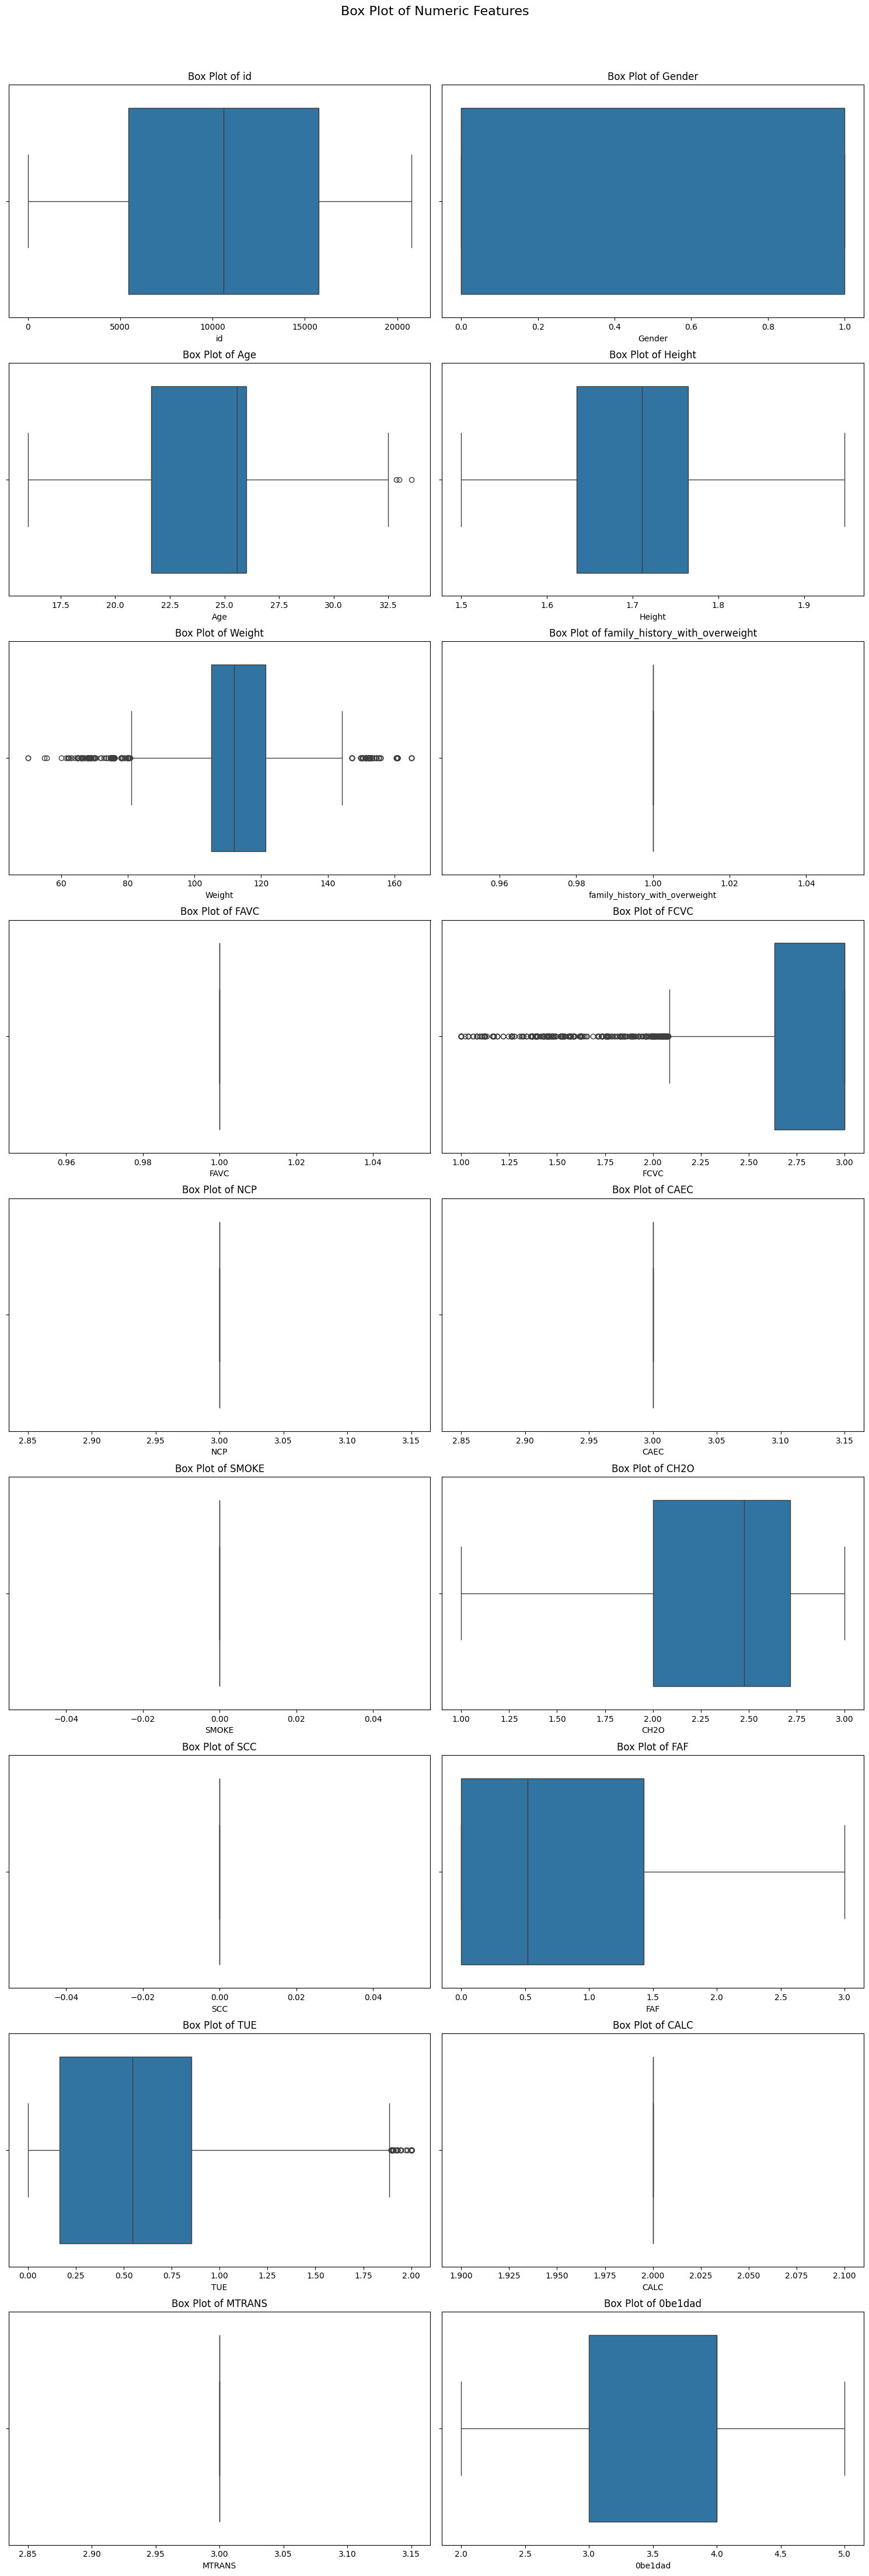

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows and columns dynamically based on the number of numeric columns
numeric_columns = df.select_dtypes(include='number').columns  # Get numeric columns from df
n_numeric_columns = len(numeric_columns)
n_cols = 2
n_rows = (n_numeric_columns + n_cols - 1) // n_cols  # Calculate rows to fit all features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust height dynamically
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot boxplots for each numeric feature
for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=df[feature], ax=axes[i])  # Use df instead of data
    axes[i].set_title(f'Box Plot of {feature}')

# Remove unused axes
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Slightly reduce the top spacing for the title
plt.show()

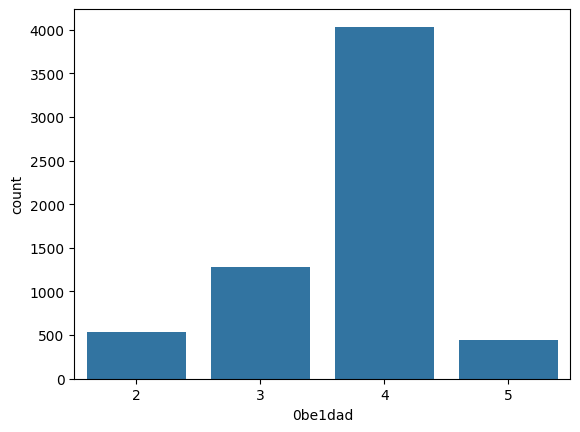

In [ ]:
sns.countplot(data=df,x='0be1dad')
plt.show()

In [ ]:
clean_data = df

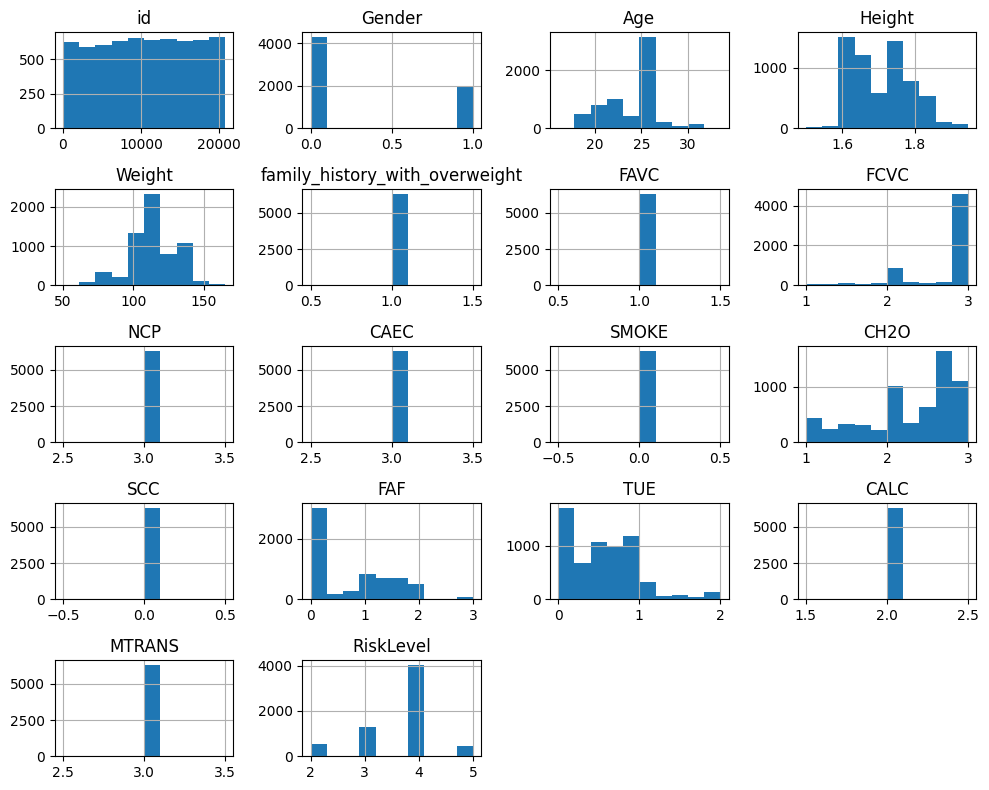

In [ ]:
fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
dataset = clean_data

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Without smote Result

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # For scaling the features

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level (1).csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve Logistic Regression convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increase max_iter to avoid convergence issue
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

# Display the results
print("Performance Evaluation Results:")
print(results.to_string(index=False, float_format='%.2f'))

Performance Evaluation Results:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         84.27            82.91            88.64          82.85         82.87    11.36     9.17
   Logistic Regression         86.08            84.84            87.93          84.66         84.69    12.07     5.35
           Naive Bayes         65.20            62.03            58.27          63.92         60.40    41.73     4.05
         Random Forest         89.69            88.69            94.67          88.78         88.68     5.33     6.60
   K-Nearest Neighbors         75.07            72.59            85.06          72.96         72.55    14.94    22.22
Support Vector Machine         85.65            84.27            91.23          84.35         84.28     8.77    10.97


# After **SMOTE** model **result** with Roc Curve and Confusion Matrix

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sampled, y_sampled = sm.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X_sampled, y_sampled,test_size=0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

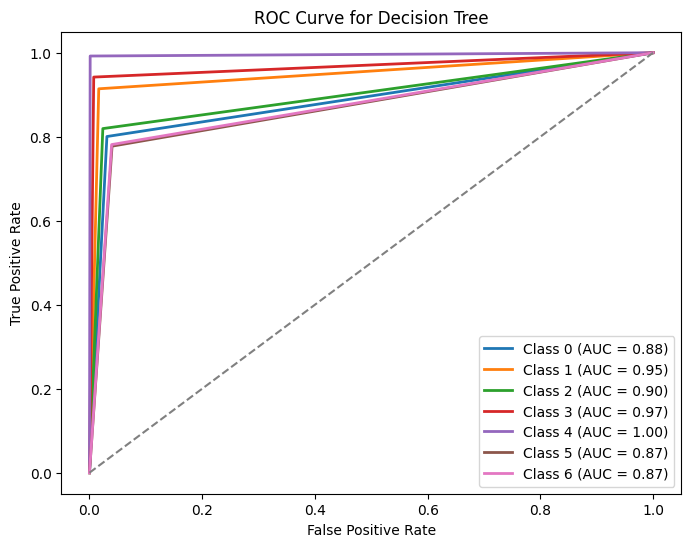

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# Ensure correct binarization of y_test
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binrarize only for test classes

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42) # Define dt_model
dt_model.fit(X_train, y_train) # Train dt_model

# Predictions for ROC Curve
if len(y_test_bin.shape) == 2 and y_test_bin.shape[1] > 1:
    # For multiclass, use a one-vs-rest approach
    y_pred_prob_dt = dt_model.predict_proba(X_test)
    fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}
    for i in range(y_test_bin.shape[1]):
        fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_dt[:, i])
        roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])
else:
    # For binary classification
    y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
if isinstance(roc_auc_dt, dict):  # Multiclass case
    for i in range(len(fpr_dt)):
        plt.plot(fpr_dt[i], tpr_dt[i], lw=2, label=f'Class {i} (AUC = {roc_auc_dt[i]:.2f})')
else:  # Binary case
    plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

#SVC Accuracy: 88%

SVC Accuracy: 0.88
Confusion Matrix for SVC:
[[652  72   1   0   0  93   4]
 [ 53 755   1   0   0   5   1]
 [  2   0 657  28   4  25  59]
 [  0   0  14 757   0   1   4]
 [  0   0   1   3 886   0   1]
 [ 48   7  27   2   0 637 106]
 [  5   0  54   7   0  80 613]]
Classification Report for SVC:
                     precision    recall  f1-score   support

       0rmal_Weight       0.86      0.79      0.82       822
Insufficient_Weight       0.91      0.93      0.92       815
     Obesity_Type_I       0.87      0.85      0.86       775
    Obesity_Type_II       0.95      0.98      0.96       776
   Obesity_Type_III       1.00      0.99      0.99       891
 Overweight_Level_I       0.76      0.77      0.76       827
Overweight_Level_II       0.78      0.81      0.79       759

           accuracy                           0.88      5665
          macro avg       0.87      0.87      0.87      5665
       weighted avg       0.88      0.88      0.87      5665



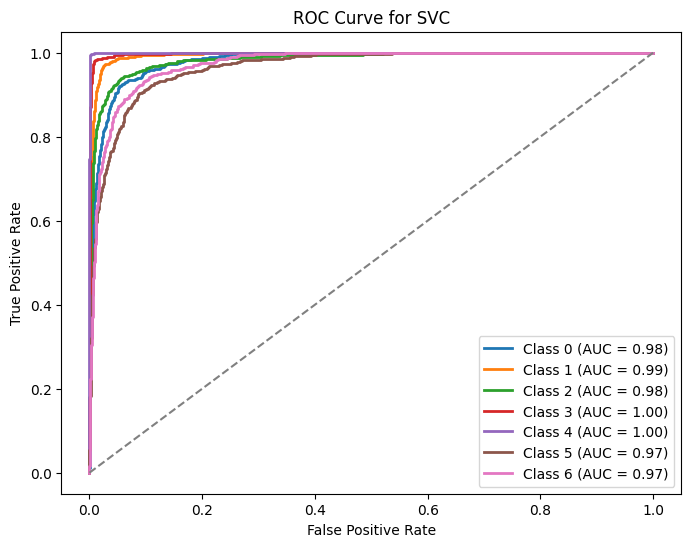

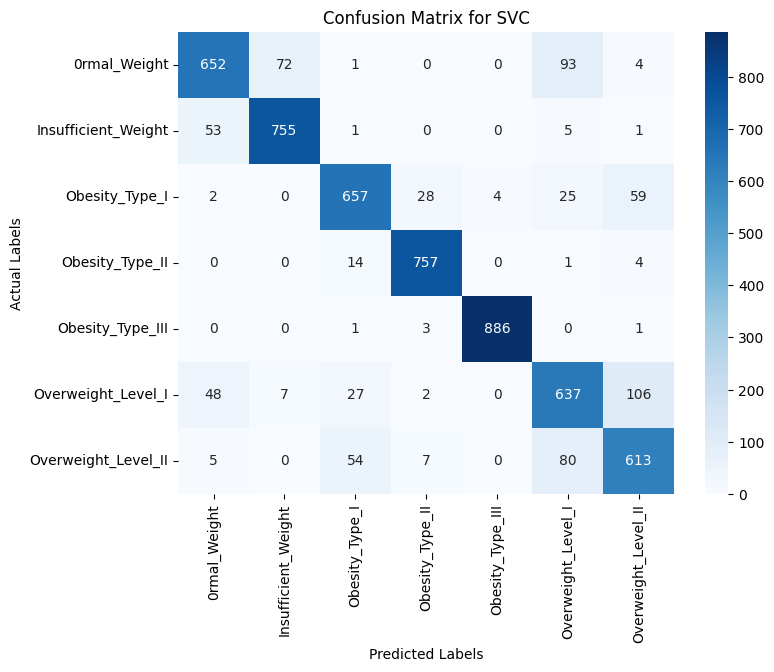

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Support Vector Classifier (SVC) with RBF kernel
svc_model = SVC(kernel='rbf', random_state=42, probability=True)

# Train the model using the training data (X_train)
svc_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svc = svc_model.predict(X_test)

# Accuracy Score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(f"Confusion Matrix for SVC:\n{cm_svc}")

# Classification Report
report_svc = classification_report(y_test, y_pred_svc)
print(f"Classification Report for SVC:\n{report_svc}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_svc = svc_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_svc, tpr_svc, roc_auc_svc = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(fpr_svc)):
    plt.plot(fpr_svc[i], tpr_svc[i], lw=2, label=f'Class {i} (AUC = {roc_auc_svc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# Random Forest Accuracy: 92%

Random Forest Accuracy: 0.92
Confusion Matrix for Random Forest:
[[740  42   1   0   0  33   6]
 [ 38 773   0   0   0   4   0]
 [  2   1 701  15   3  12  41]
 [  0   0  13 755   0   0   8]
 [  0   0   0   2 888   1   0]
 [ 35   8   7   0   0 703  74]
 [ 10   0  28   1   0  43 677]]
Classification Report for Random Forest:
                     precision    recall  f1-score   support

       0rmal_Weight       0.90      0.90      0.90       822
Insufficient_Weight       0.94      0.95      0.94       815
     Obesity_Type_I       0.93      0.90      0.92       775
    Obesity_Type_II       0.98      0.97      0.97       776
   Obesity_Type_III       1.00      1.00      1.00       891
 Overweight_Level_I       0.88      0.85      0.87       827
Overweight_Level_II       0.84      0.89      0.87       759

           accuracy                           0.92      5665
          macro avg       0.92      0.92      0.92      5665
       weighted avg       0.92      0.92      0.92      5665



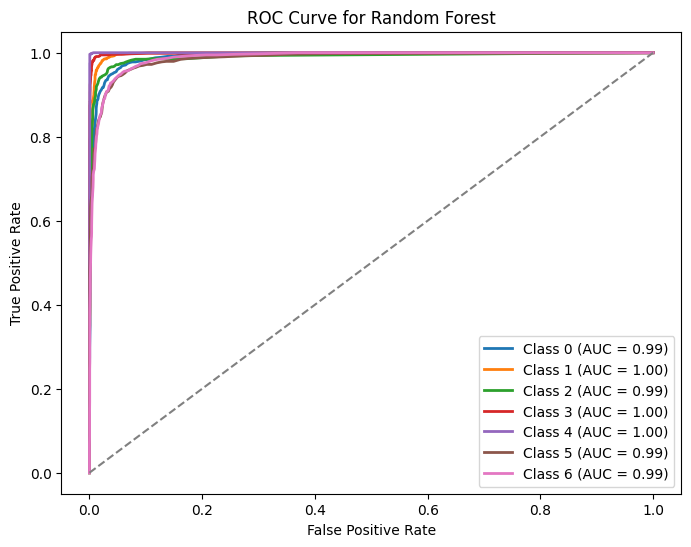

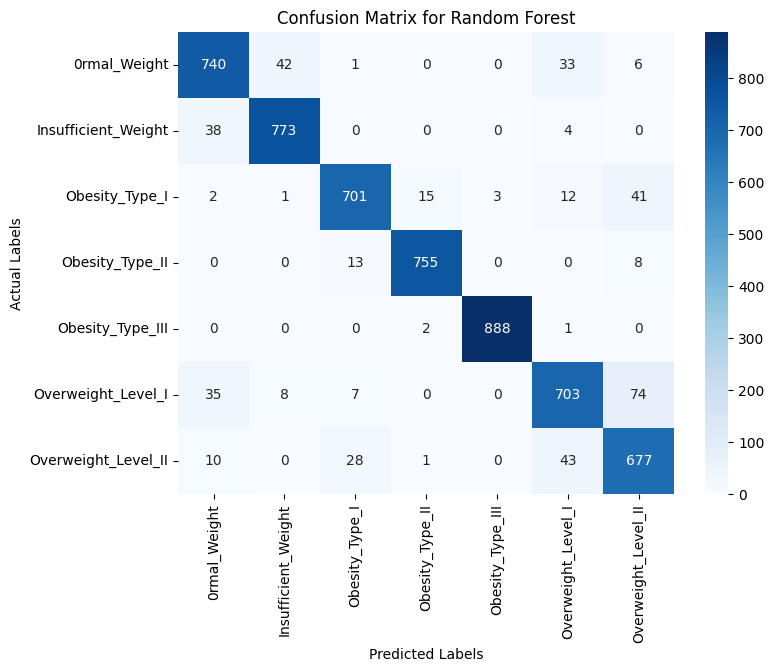

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data (X_train)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix for Random Forest:\n{cm_rf}")

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print(f"Classification Report for Random Forest:\n{report_rf}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(fpr_rf)):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label=f'Class {i} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()



# Decision Tree Accuracy: 86%

Decision Tree Accuracy: 0.86
Confusion Matrix for Decision Tree:
[[658  70   1   0   0  72  21]
 [ 57 745   0   0   1  11   1]
 [  4   1 635  33   5  25  72]
 [  0   1  31 731   0   0  13]
 [  0   0   5   2 884   0   0]
 [ 69   8  21   0   0 643  86]
 [ 20   0  58   2   0  86 593]]
Classification Report for Decision Tree:
                     precision    recall  f1-score   support

       0rmal_Weight       0.81      0.80      0.81       822
Insufficient_Weight       0.90      0.91      0.91       815
     Obesity_Type_I       0.85      0.82      0.83       775
    Obesity_Type_II       0.95      0.94      0.95       776
   Obesity_Type_III       0.99      0.99      0.99       891
 Overweight_Level_I       0.77      0.78      0.77       827
Overweight_Level_II       0.75      0.78      0.77       759

           accuracy                           0.86      5665
          macro avg       0.86      0.86      0.86      5665
       weighted avg       0.86      0.86      0.86      5665



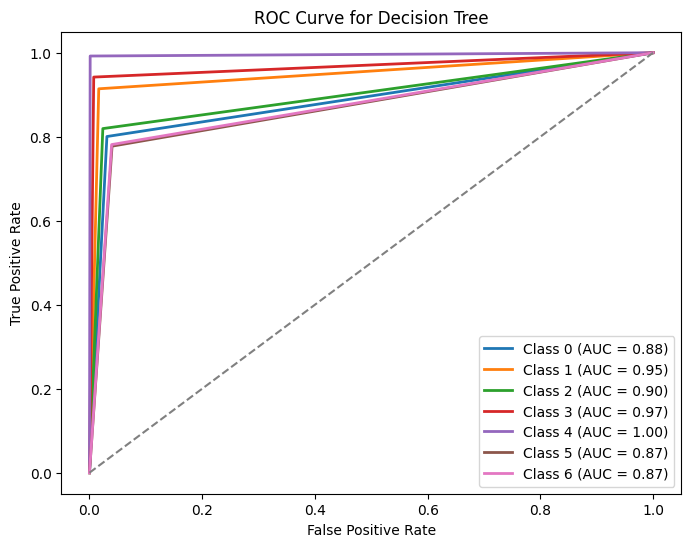

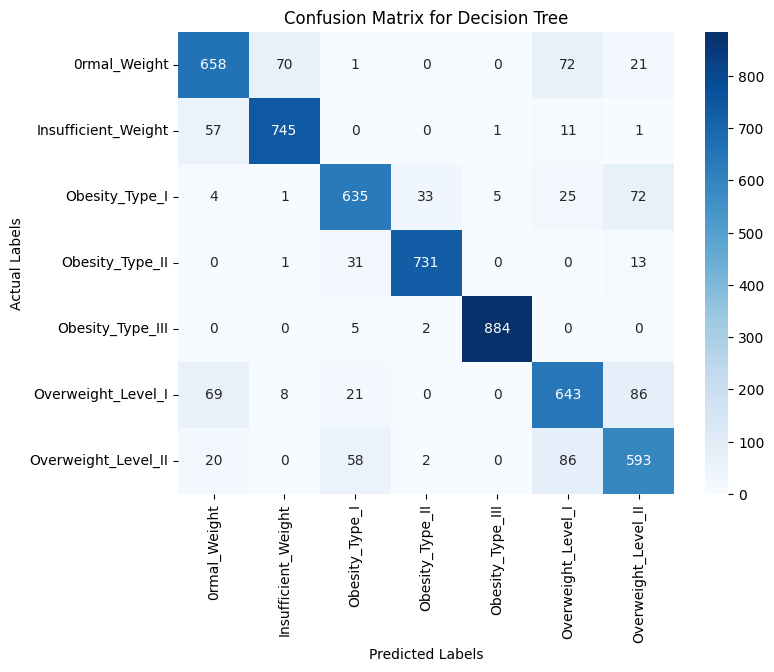

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data (X_train)
dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix for Decision Tree:\n{cm_dt}")

# Classification Report
report_dt = classification_report(y_test, y_pred_dt)
print(f"Classification Report for Decision Tree:\n{report_dt}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_dt = dt_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(fpr_dt)):
    plt.plot(fpr_dt[i], tpr_dt[i], lw=2, label=f'Class {i} (AUC = {roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# Logistic Regression Accuracy:74%

Logistic Regression Accuracy: 0.74
Confusion Matrix for Logistic Regression:
[[440 103  20   0   0 156 103]
 [ 32 775   1   0   0   3   4]
 [ 13   1 509  89  13  62  88]
 [  0   0  23 745   0   0   8]
 [  0   0   0   2 889   0   0]
 [145   8  74   0   0 447 153]
 [ 45   0 185  10   2 119 398]]
Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

       0rmal_Weight       0.65      0.54      0.59       822
Insufficient_Weight       0.87      0.95      0.91       815
     Obesity_Type_I       0.63      0.66      0.64       775
    Obesity_Type_II       0.88      0.96      0.92       776
   Obesity_Type_III       0.98      1.00      0.99       891
 Overweight_Level_I       0.57      0.54      0.55       827
Overweight_Level_II       0.53      0.52      0.53       759

           accuracy                           0.74      5665
          macro avg       0.73      0.74      0.73      5665
       weighted avg       0.73      0.74      

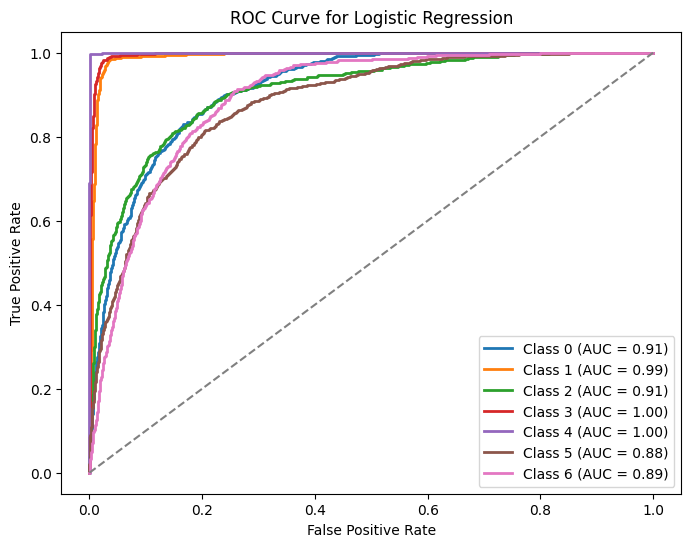

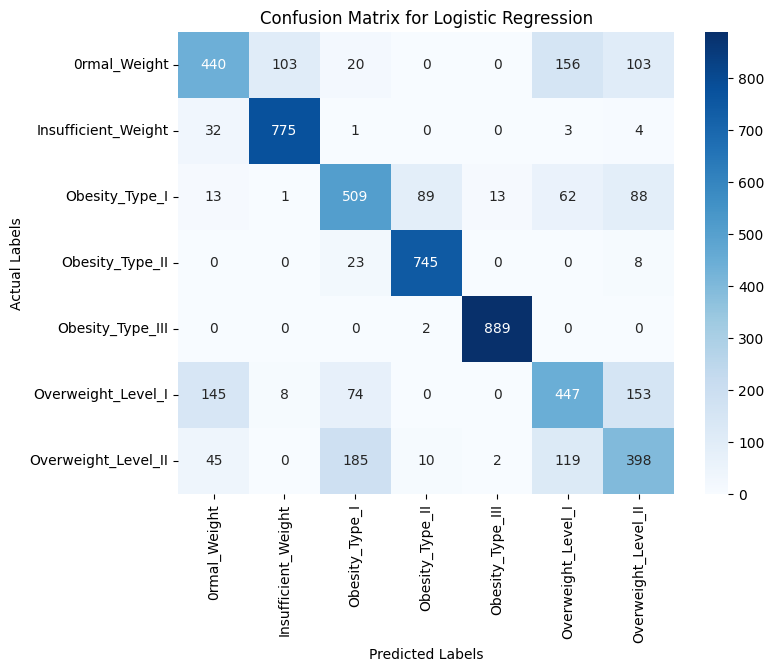

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')

# Train the model using the training data (X_train)
log_reg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Accuracy Score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f"Confusion Matrix for Logistic Regression:\n{cm_log_reg}")

# Classification Report
report_log_reg = classification_report(y_test, y_pred_log_reg)
print(f"Classification Report for Logistic Regression:\n{report_log_reg}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_log_reg = log_reg_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_log_reg, tpr_log_reg, roc_auc_log_reg = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_log_reg[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(fpr_log_reg)):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], lw=2, label=f'Class {i} (AUC = {roc_auc_log_reg[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# KNN Accuracy: 77%

KNN Accuracy: 0.77
KNN Accuracy: 0.77
Confusion Matrix for KNN:
[[537 122  13   0   0  97  53]
 [122 671   1   0   0  18   3]
 [ 23   0 559  41   5  65  82]
 [  2   0  33 725   0   1  15]
 [  1   0   1   2 886   1   0]
 [138  30  75   1   0 484  99]
 [ 56  11  84  13   0  90 505]]
Classification Report for KNN:
                     precision    recall  f1-score   support

       0rmal_Weight       0.61      0.65      0.63       822
Insufficient_Weight       0.80      0.82      0.81       815
     Obesity_Type_I       0.73      0.72      0.73       775
    Obesity_Type_II       0.93      0.93      0.93       776
   Obesity_Type_III       0.99      0.99      0.99       891
 Overweight_Level_I       0.64      0.59      0.61       827
Overweight_Level_II       0.67      0.67      0.67       759

           accuracy                           0.77      5665
          macro avg       0.77      0.77      0.77      5665
       weighted avg       0.77      0.77      0.77      5665



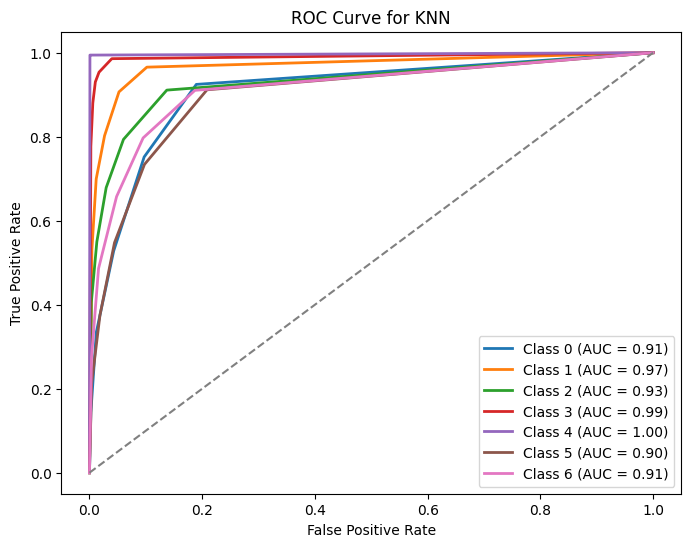

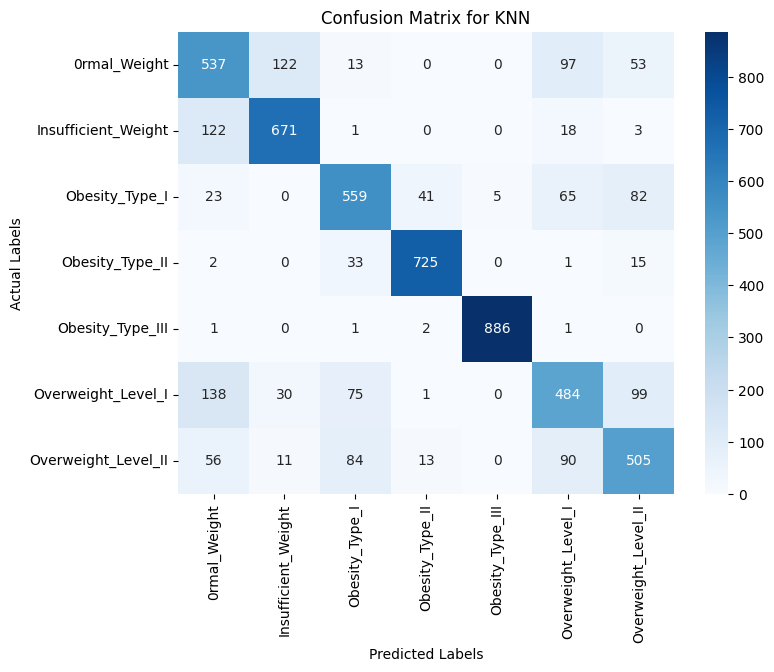

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model using the training data (X_train)
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data (X_train)
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix for KNN:\n{cm_knn}")

# Classification Report
report_knn = classification_report(y_test, y_pred_knn)
print(f"Classification Report for KNN:\n{report_knn}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_knn = knn_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_knn, tpr_knn, roc_auc_knn = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(fpr_knn)):
    plt.plot(fpr_knn[i], tpr_knn[i], lw=2, label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()



# Gaussian Naive Bayes Accuracy: 65%

Gaussian Naive Bayes Accuracy: 0.65
Confusion Matrix for GNB:
[[338 256  64   1  25  92  46]
 [ 37 716  51   0   4   3   4]
 [  6   1 466 232   6  31  33]
 [  2   0  31 734   0   0   9]
 [  1   0   1   2 885   2   0]
 [ 79  31 287  36   5 290  99]
 [ 35   2 353  98   2  43 226]]
Classification Report for GNB:
                     precision    recall  f1-score   support

       0rmal_Weight       0.68      0.41      0.51       822
Insufficient_Weight       0.71      0.88      0.79       815
     Obesity_Type_I       0.37      0.60      0.46       775
    Obesity_Type_II       0.67      0.95      0.78       776
   Obesity_Type_III       0.95      0.99      0.97       891
 Overweight_Level_I       0.63      0.35      0.45       827
Overweight_Level_II       0.54      0.30      0.38       759

           accuracy                           0.65      5665
          macro avg       0.65      0.64      0.62      5665
       weighted avg       0.66      0.65      0.63      5665



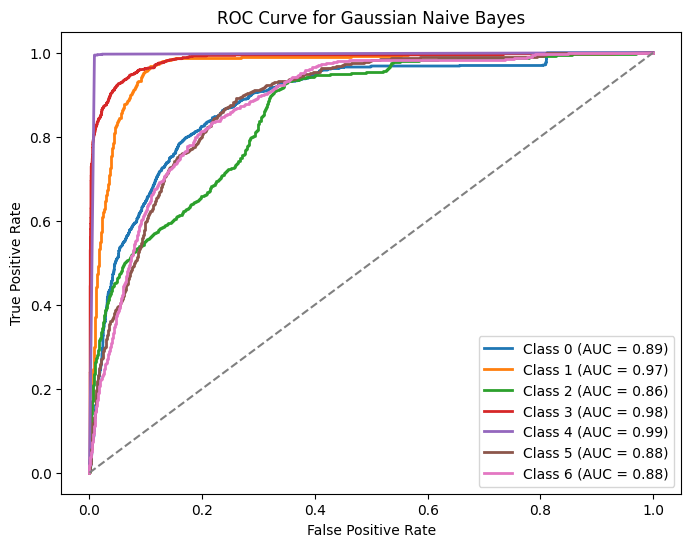

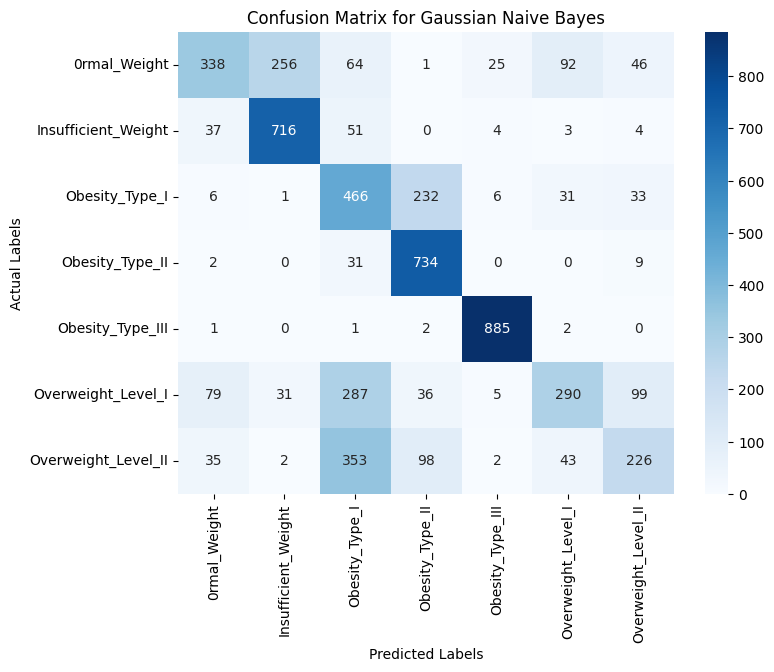

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Gaussian Naive Bayes (GNB) model
gnb_model = GaussianNB()

# Train the model using the training data (X_train)
gnb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gnb = gnb_model.predict(X_test)

# Accuracy Score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}")

# Confusion Matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(f"Confusion Matrix for GNB:\n{cm_gnb}")

# Classification Report
report_gnb = classification_report(y_test, y_pred_gnb)
print(f"Classification Report for GNB:\n{report_gnb}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_gnb = gnb_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_gnb, tpr_gnb, roc_auc_gnb = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_gnb[i], tpr_gnb[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_gnb[:, i])
    roc_auc_gnb[i] = auc(fpr_gnb[i], tpr_gnb[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(fpr_gnb)):
    plt.plot(fpr_gnb[i], tpr_gnb[i], lw=2, label=f'Class {i} (AUC = {roc_auc_gnb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# XGBoost Accuracy: 92%

XGBoost Accuracy: 0.92
Confusion Matrix for XGBoost:
[[723  47   1   0   0  43   8]
 [ 36 775   1   0   0   3   0]
 [  2   1 697  16   3  15  41]
 [  0   0  13 754   0   0   9]
 [  0   0   0   2 888   0   1]
 [ 31   8  13   0   1 704  70]
 [  7   0  33   1   0  51 667]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       822
           1       0.93      0.95      0.94       815
           2       0.92      0.90      0.91       775
           3       0.98      0.97      0.97       776
           4       1.00      1.00      1.00       891
           5       0.86      0.85      0.86       827
           6       0.84      0.88      0.86       759

    accuracy                           0.92      5665
   macro avg       0.92      0.92      0.92      5665
weighted avg       0.92      0.92      0.92      5665



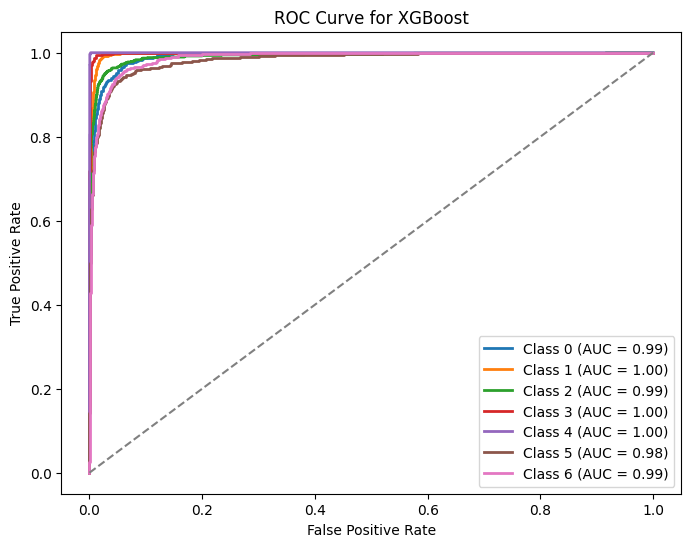

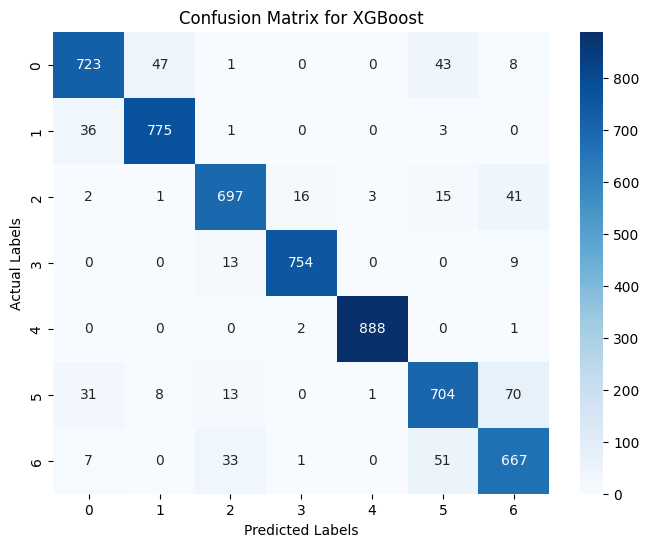

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable 'y_train' and 'y_test' to numeric values
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Now, train the model using the training data (X_train)
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Confusion Matrix for XGBoost:\n{cm_xgb}")

# Classification Report
report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification Report for XGBoost:\n{report_xgb}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_xgb, tpr_xgb, roc_auc_xgb = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(fpr_xgb)):
    plt.plot(fpr_xgb[i], tpr_xgb[i], lw=2, label=f'Class {i} (AUC = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# LGBMClassifier Accuracy:92%

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 22657, number of used features: 16
[LightGBM] [Info] Start training from score -1.949846
[LightGBM] [Info] Start training from score -1.947677
[LightGBM] [Info] Start training from score -1.935373
[LightGBM] [Info] Start training from score -1.935679
[LightGBM] [Info] Start training from score -1.971480
[LightGBM] [Info] Start training from score -1.951398
[LightGBM] [Info] Start training from score -1.930494
LightGBM Accuracy: 0.92
Confusion Matrix for LightGBM:
[[727  45   2   0   0  42   6]
 [ 35 775   1   0   0   4   0]
 [  2   1 703  13   3  12  41]
 [  0   0  11 756   0   0   9]
 [  0   0   0   2 888   0   1]
 [ 31   8  15   0   0 710  63]
 [  8   0  31   2   1  51 66

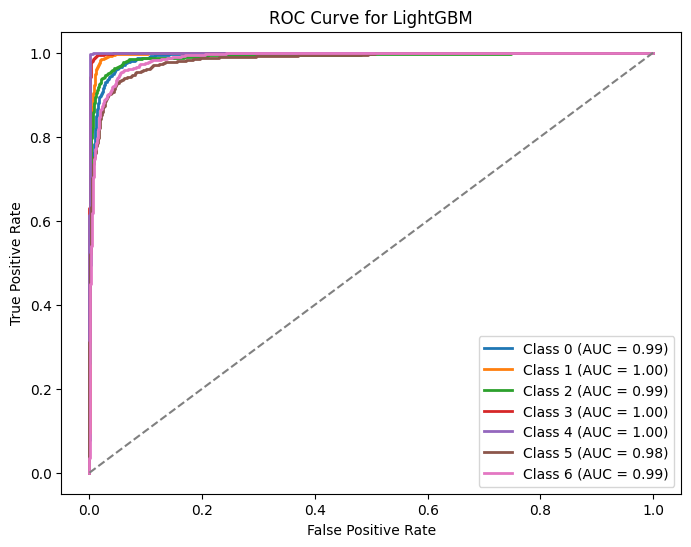

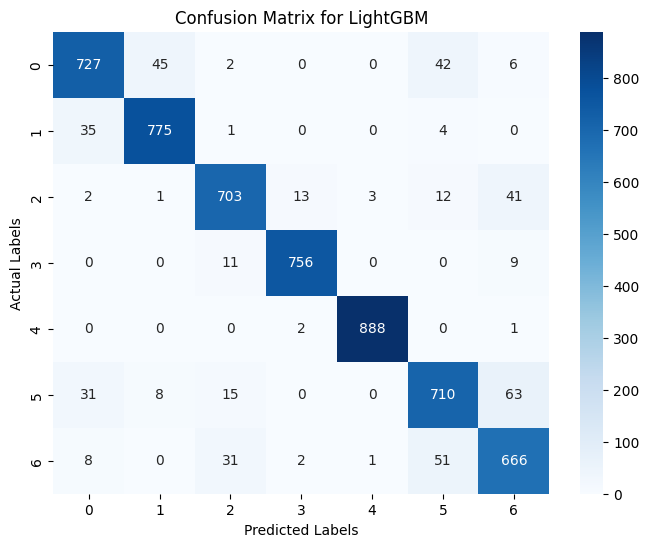

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the LightGBM Classifier model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model using the training data (X_train)
lgbm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Accuracy Score
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}")

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print(f"Confusion Matrix for LightGBM:\n{cm_lgbm}")

# Classification Report
report_lgbm = classification_report(y_test, y_pred_lgbm)
print(f"Classification Report for LightGBM:\n{report_lgbm}")

# Binarize the labels for ROC curve (one-vs-rest approach for multiclass)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probabilities for ROC calculation (one-vs-rest for each class)
y_pred_prob_lgbm = lgbm_model.predict_proba(X_test)

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_lgbm, tpr_lgbm, roc_auc_lgbm = {}, {}, {}

# Loop through each class and calculate the ROC curve and AUC
for i in range(y_test_bin.shape[1]):
    fpr_lgbm[i], tpr_lgbm[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_lgbm[:, i])
    roc_auc_lgbm[i] = auc(fpr_lgbm[i], tpr_lgbm[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(fpr_lgbm)):
    plt.plot(fpr_lgbm[i], tpr_lgbm[i], lw=2, label=f'Class {i} (AUC = {roc_auc_lgbm[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


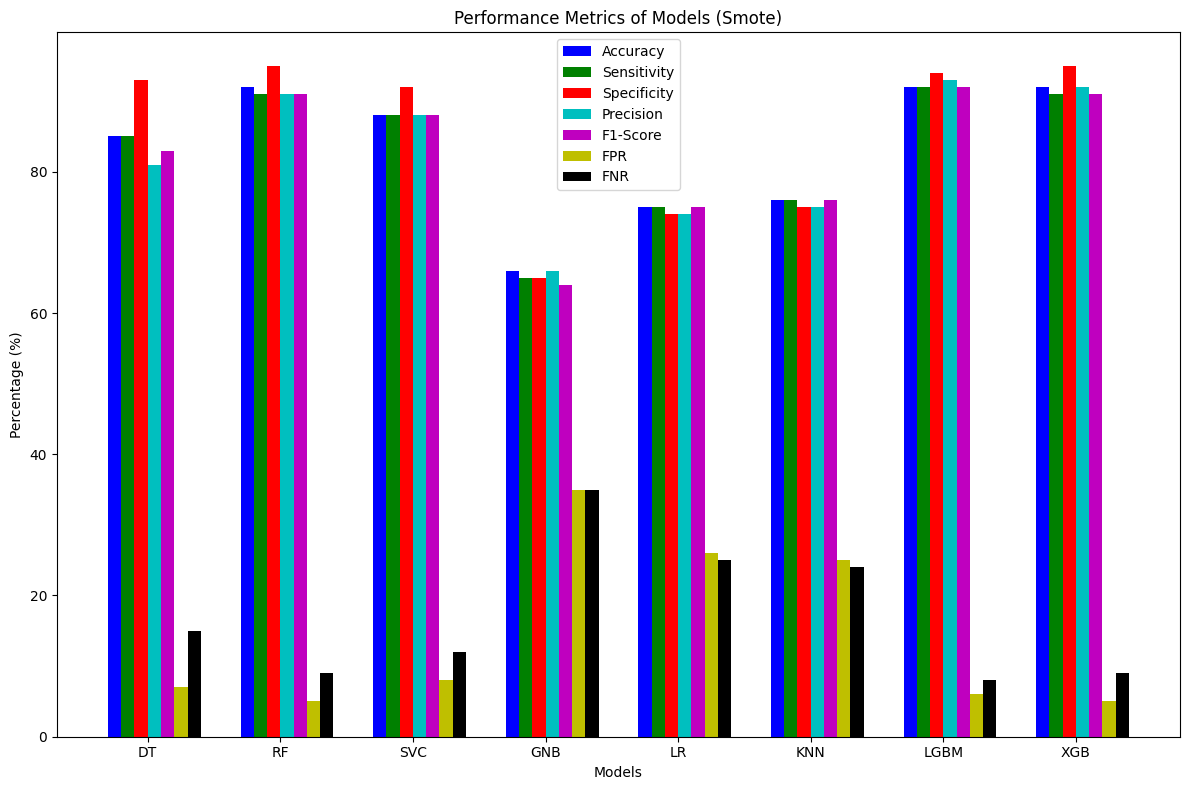

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated performance metrics from the "Smote" table
models = ['DT', 'RF', 'SVC', 'GNB', 'LR', 'KNN', 'LGBM', 'XGB']
accuracy = [85.00, 92.00, 88.00, 66.00, 75.00, 76.00, 92.00, 92.00]
precision = [81.00, 91.00, 88.00, 66.00, 74.00, 75.00, 93.00, 92.00]
recall = [85.00, 91.00, 88.00, 65.00, 75.00, 76.00, 92.00, 91.00]
f1_score = [83.00, 91.00, 88.00, 64.00, 75.00, 76.00, 92.00, 91.00]
sensitivity = [85.00, 91.00, 88.00, 65.00, 75.00, 76.00, 92.00, 91.00]
fnr = [15.00, 9.00, 12.00, 35.00, 25.00, 24.00, 8.00, 9.00]
fpr = [7.00, 5.00, 8.00, 35.00, 26.00, 25.00, 6.00, 5.00]
specificity = [93.00, 95.00, 92.00, 65.00, 74.00, 75.00, 94.00, 95.00]

# Define bar positions for each metric
bar_width = 0.1
index = np.arange(len(models))

# Create the figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for each metric
ax.bar(index, accuracy, bar_width, label='Accuracy', color='b')
ax.bar(index + bar_width, sensitivity, bar_width, label='Sensitivity', color='g')
ax.bar(index + 2 * bar_width, specificity, bar_width, label='Specificity', color='r')
ax.bar(index + 3 * bar_width, precision, bar_width, label='Precision', color='c')
ax.bar(index + 4 * bar_width, f1_score, bar_width, label='F1-Score', color='m')
ax.bar(index + 5 * bar_width, fpr, bar_width, label='FPR', color='y')
ax.bar(index + 6 * bar_width, fnr, bar_width, label='FNR', color='k')

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Performance Metrics of Models (Smote)')
ax.set_xticks(index + 2.5 * bar_width)  # To position the labels in the middle
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# After Adasyn model result

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load your dataset
data = pd.read_csv("/content/obesity_level (1).csv")

# Inspect the dataset to find the target column name
print(data.columns)  # Check column names for the correct target column

# Assuming the target column is '0be1dad', replace with the actual target column name
X = data.drop('0be1dad', axis=1)  # Drop the target column
y = data['0be1dad']  # Assuming '0be1dad' is the target column

# Convert categorical features to numeric using LabelEncoder or OneHotEncoder
label_columns = ['Gender', 'SMOKE', 'MTRANS', 'family_history_with_overweight', 'CAEC', 'CALC']

# Apply LabelEncoder for binary or ordinal categorical features
label_encoder = LabelEncoder()

for col in label_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target labels
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Now check if the dataset is numeric (no strings should be left)
print(X.head())  # Verify that all columns are now numeric

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN for balancing the dataset (synthetic data generation for imbalanced classes)
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# Initialize models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Dictionary to store evaluation metrics for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model with ADASYN resampled data
    model.fit(X_train_adasyn, y_train_adasyn)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Store the metrics in the results dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

# Display the results for each model
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{pd.DataFrame(metrics['Classification Report']).transpose()}\n")


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad'],
      dtype='object')
   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     3      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     3      0   
3                               1     1  3.000000  3.000000     3      0   
4                               1     1  2.679664  1.971472     3      0   

       CH2O  SCC       

# Feature_selection

# 5 fold

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('/content/obesity_level (1).csv')

# Rename target column for clarity
data = data.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
data['obesity_level'] = le.fit_transform(data['obesity_level'])

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical features, if any
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = data.drop('obesity_level', axis=1)
y = data['obesity_level']

# Standardize numerical features for ANOVA and RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale features to non-negative range for Chi-Square
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_train_nn, X_test_nn, _, _ = train_test_split(X_non_negative, y, test_size=0.5, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train_nn, y_train)
X_test_chi2 = chi2_selector.transform(X_test_nn)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = []

# Evaluate each model with each feature selection method
for model_name, model in models.items():
    # ANOVA
    model.fit(X_train_anova, y_train)
    y_pred_anova = model.predict(X_test_anova)
    accuracy_anova = accuracy_score(y_test, y_pred_anova)

    # Chi-Square
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict(X_test_chi2)
    accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)

    # RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # Append results
    results.append({'Model': model_name, 'Method': 'ANOVA', 'Accuracy': accuracy_anova})
    results.append({'Model': model_name, 'Method': 'Chi-Square', 'Accuracy': accuracy_chi2})
    results.append({'Model': model_name, 'Method': 'RFE', 'Accuracy': accuracy_rfe})

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print("Accuracy Results for Different Models and Feature Selection Methods:\n")
print(results_df)

# Hyperparameter Tuning for Random Forest with GridSearchCV (Optional)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_anova, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_anova)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nAccuracy of Tuned Random Forest on Test Data:", accuracy_best)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 10379, number of used features: 10
[LightGBM] [Info] Start training from score -1.922391
[LightGBM] [Info] Start training from score -2.103922
[LightGBM] [Info] Start training from score -1.966154
[LightGBM] [Info] Start training from score -1.846309
[LightGBM] [Info] Start training from score -1.631256
[LightGBM] [Info] Start training from score -2.145864
[LightGBM] [Info] Start training from score -2.109467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 517

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Results for Different Models and Feature Selection Methods:

                  Model      Method  Accuracy
0         Decision Tree       ANOVA  0.842952
1         Decision Tree  Chi-Square  0.809230
2         Decision Tree         RFE  0.837460
3         Random Forest       ANOVA  0.883707
4         Random Forest  Chi-Square  0.817227
5         Random Forest         RFE  0.873784
6     Gradient Boosting       ANOVA  0.889199
7     Gradient Boosting  Chi-Square  0.842278
8     Gradient Boosting         RFE  0.882744
9                   SVC       ANOVA  0.854803
10                  SVC  Chi-Square  0.764332
11                  SVC         RFE  0.854321
12           GaussianNB       ANOVA  0.627806
13           GaussianNB  Chi-Square  0.591194
14           GaussianNB         RFE  0.662395
15  Logistic Regression       ANOVA  0.849118
16  Logistic Regression  Chi-Square  0.759322
17  Logistic Regression         RFE  0.843916
18  K-Nearest Neighbors       ANOVA  0.798054
19  K-Near

# 10 fold

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('/content/obesity_level (1).csv')

# Rename target column for clarity
data = data.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
data['obesity_level'] = le.fit_transform(data['obesity_level'])

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical features, if any
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = data.drop('obesity_level', axis=1)
y = data['obesity_level']

# Standardize numerical features for ANOVA and RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale features to non-negative range for Chi-Square
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_train_nn, X_test_nn, _, _ = train_test_split(X_non_negative, y, test_size=0.5, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train_nn, y_train)
X_test_chi2 = chi2_selector.transform(X_test_nn)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = []

# Evaluate each model with each feature selection method
for model_name, model in models.items():
    # ANOVA
    model.fit(X_train_anova, y_train)
    y_pred_anova = model.predict(X_test_anova)
    accuracy_anova = accuracy_score(y_test, y_pred_anova)

    # Chi-Square
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict(X_test_chi2)
    accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)

    # RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # Append results
    results.append({'Model': model_name, 'Method': 'ANOVA', 'Accuracy': accuracy_anova})
    results.append({'Model': model_name, 'Method': 'Chi-Square', 'Accuracy': accuracy_chi2})
    results.append({'Model': model_name, 'Method': 'RFE', 'Accuracy': accuracy_rfe})

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print("Accuracy Results for Different Models and Feature Selection Methods:\n")
print(results_df)

# Hyperparameter Tuning for Random Forest with GridSearchCV (Optional)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_anova, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_anova)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nAccuracy of Tuned Random Forest on Test Data:", accuracy_best)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 10379, number of used features: 10
[LightGBM] [Info] Start training from score -1.922391
[LightGBM] [Info] Start training from score -2.103922
[LightGBM] [Info] Start training from score -1.966154
[LightGBM] [Info] Start training from score -1.846309
[LightGBM] [Info] Start training from score -1.631256
[LightGBM] [Info] Start training from score -2.145864
[LightGBM] [Info] Start training from score -2.109467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:11:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Results for Different Models and Feature Selection Methods:

                  Model      Method  Accuracy
0         Decision Tree       ANOVA  0.842952
1         Decision Tree  Chi-Square  0.809230
2         Decision Tree         RFE  0.837364
3         Random Forest       ANOVA  0.883707
4         Random Forest  Chi-Square  0.817227
5         Random Forest         RFE  0.882070
6     Gradient Boosting       ANOVA  0.889199
7     Gradient Boosting  Chi-Square  0.842278
8     Gradient Boosting         RFE  0.889777
9                   SVC       ANOVA  0.854803
10                  SVC  Chi-Square  0.764332
11                  SVC         RFE  0.852491
12           GaussianNB       ANOVA  0.627806
13           GaussianNB  Chi-Square  0.591194
14           GaussianNB         RFE  0.674439
15  Logistic Regression       ANOVA  0.849118
16  Logistic Regression  Chi-Square  0.759322
17  Logistic Regression         RFE  0.850467
18  K-Nearest Neighbors       ANOVA  0.798054
19  K-Near

# After Cross Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('/content/obesity_level (1).csv')

# Rename target column for clarity
data = data.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
data['obesity_level'] = le.fit_transform(data['obesity_level'])

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical features, if any
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = data.drop('obesity_level', axis=1)
y = data['obesity_level']

# Standardize numerical features for ANOVA and RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale features to non-negative range for Chi-Square
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_train_nn, X_test_nn, _, _ = train_test_split(X_non_negative, y, test_size=0.5, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train_nn, y_train)
X_test_chi2 = chi2_selector.transform(X_test_nn)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = []

# Cross-validation evaluation
cv_results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results.append({'Model': model_name, 'Mean Accuracy': scores.mean(), 'Std Deviation': scores.std()})

cv_results_df = pd.DataFrame(cv_results)
print("\nCross-Validation Results:")
print(cv_results_df)

# Evaluate each model with each feature selection method
for model_name, model in models.items():
    # ANOVA
    model.fit(X_train_anova, y_train)
    y_pred_anova = model.predict(X_test_anova)
    accuracy_anova = accuracy_score(y_test, y_pred_anova)

    # Chi-Square
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict(X_test_chi2)
    accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)

    # RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # Append results
    results.append({'Model': model_name, 'Method': 'ANOVA', 'Accuracy': accuracy_anova})
    results.append({'Model': model_name, 'Method': 'Chi-Square', 'Accuracy': accuracy_chi2})
    results.append({'Model': model_name, 'Method': 'RFE', 'Accuracy': accuracy_rfe})

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print("Accuracy Results for Different Models and Feature Selection Methods:\n")
print(results_df)

# Hyperparameter Tuning for Random Forest with GridSearchCV (Optional)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_anova, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_anova)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\nAccuracy of Tuned Random Forest on Test Data:", accuracy_best)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 23
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2293
[LightGBM] [Info] Number of data points in the train set: 16606, number o

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:34:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Cross-Validation Results:
                 Model  Mean Accuracy  Std Deviation
0        Decision Tree       0.820407       0.034879
1        Random Forest       0.892331       0.004946
2    Gradient Boosting       0.889777       0.016344
3                  SVC       0.848107       0.007138
4           GaussianNB       0.607428       0.005718
5  Logistic Regression       0.862897       0.006361
6  K-Nearest Neighbors       0.723383       0.008095
7             LightGBM       0.872528       0.042449
8              XGBoost       0.883032       0.021164


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 10379, number of used features: 10
[LightGBM] [Info] Start training from score -1.922391
[LightGBM] [Info] Start training from score -2.103922
[LightGBM] [Info] Start training from score -1.966154
[LightGBM] [Info] Start training from score -1.846309
[LightGBM] [Info] Start training from score -1.631256
[LightGBM] [Info] Start training from score -2.145864
[LightGBM] [Info] Start training from score -2.109467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 517

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:35:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:35:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Results for Different Models and Feature Selection Methods:

                  Model      Method  Accuracy
0         Decision Tree       ANOVA  0.842952
1         Decision Tree  Chi-Square  0.809230
2         Decision Tree         RFE  0.837364
3         Random Forest       ANOVA  0.883707
4         Random Forest  Chi-Square  0.817227
5         Random Forest         RFE  0.882070
6     Gradient Boosting       ANOVA  0.889199
7     Gradient Boosting  Chi-Square  0.842278
8     Gradient Boosting         RFE  0.889777
9                   SVC       ANOVA  0.854803
10                  SVC  Chi-Square  0.764332
11                  SVC         RFE  0.852491
12           GaussianNB       ANOVA  0.627806
13           GaussianNB  Chi-Square  0.591194
14           GaussianNB         RFE  0.674439
15  Logistic Regression       ANOVA  0.849118
16  Logistic Regression  Chi-Square  0.759322
17  Logistic Regression         RFE  0.850467
18  K-Nearest Neighbors       ANOVA  0.798054
19  K-Near